In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

#### Общие проверки

In [101]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

#### Масштабирование признаков

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = pd.DataFrame(scaler.fit_transform(df))
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


#### Разделение на тренировочную и тестовую выборки

In [105]:
from sklearn.model_selection import train_test_split
X = np.array(df.drop('Outcome', axis=1))
y = np.array(df['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.

In [106]:
def minkowski_distance(x1, x2, p: int):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
class KNN:
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Вычисление расстояний между x и всеми обучающими примерами
        distances = [minkowski_distance(x, x_train, self.p) for x_train in self.X_train]
        # Сортировка индексов обучающих примеров по расстоянию
        k_indices = np.argsort(distances)[:self.k]
        # Получение меток k ближайших соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Возвращение наиболее часто встречающейся метки
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [107]:
knn = KNN(k=10, p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7142857142857143

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[88,  9],
       [35, 22]])

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80        97
         1.0       0.71      0.39      0.50        57

    accuracy                           0.71       154
   macro avg       0.71      0.65      0.65       154
weighted avg       0.71      0.71      0.69       154



#### Попытки чуть лучше понять результаты 

In [111]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X_train, y_train)
y_pred_sci = knn.predict(X_test)
accuracy_score(y_test, y_pred_sci)

0.7142857142857143

##### Сделаем график !

Уменьшим размерность чтобы можно было посмотреть на графике.

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])
X_pca_plot = pd.concat([X_pca, pd.DataFrame(y, columns = ['target'])], axis = 1)
X_pca_plot.head()

,pc1,pc2,target
0,0.304955,0.090382,1.0
1,-0.193298,-0.072952,0.0
2,0.218108,-0.127575,1.0
3,-0.298826,-0.057153,0.0
4,-0.169495,0.382749,1.0


In [113]:
def plot(dff):
    plt.figure(figsize=(10,5)) 
    plt.scatter(dff.pc1[dff.target == 1], dff.pc2[dff.target == 1], color='blue', label='1', s=10)
    plt.scatter(dff.pc1[dff.target == 0], dff.pc2[dff.target == 0], color='red', label='0', s=10)
    plt.legend()
    plt.ylabel('pc1')
    plt.xlabel('pc2')

Посмотрим на распределение данных

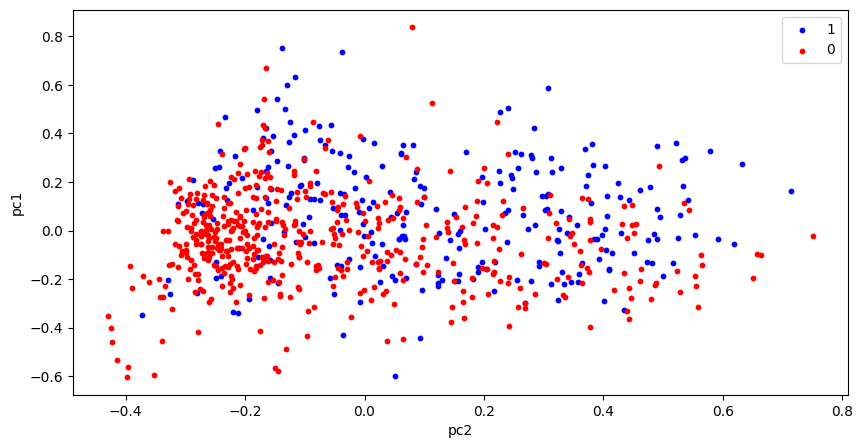

In [114]:
plot(X_pca_plot)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=13)

Посмотрим на распределение тестовых данных

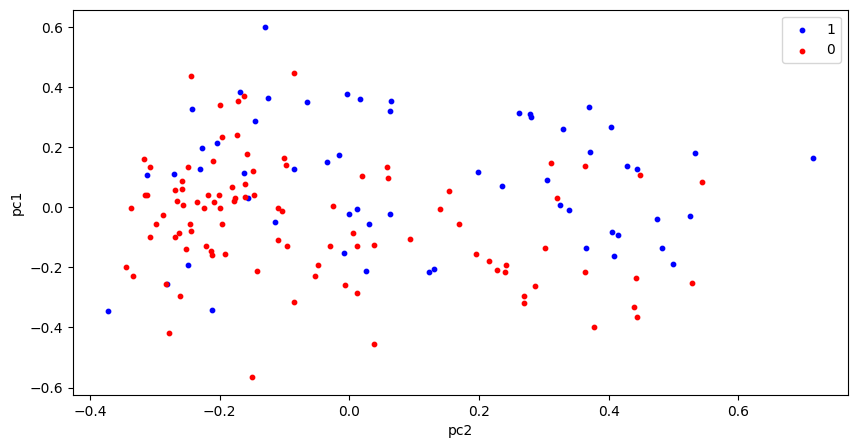

In [116]:
plot(X_pca_plot.loc[X_test.index])

Обучим модель KNN

In [117]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train, y_train)
y_pred_sci = knn.predict(X_test)
accuracy_score(y_test, y_pred_sci)

0.6558441558441559

In [118]:
pd.DataFrame(data = [X_pca_plot.max(), X_pca_plot.min()], index=['max', 'min'])

,pc1,pc2,target
max,0.750547,0.836664,1.0
min,-0.429426,-0.603863,0.0


In [119]:
X_test = np.array(X_test)
X_test[0][:2]

array([-0.14331256, -0.21079354])

In [120]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3, algorithm='brute', metric='minkowski', p=2)
neigh.fit(X_train)

NearestNeighbors(algorithm='brute', n_neighbors=3)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[0.02240521 0.0233388  0.0239059 ]] [[415 145  57]]
[[1. 0.]]
0.0


Text(0.5, 0, 'pc2')

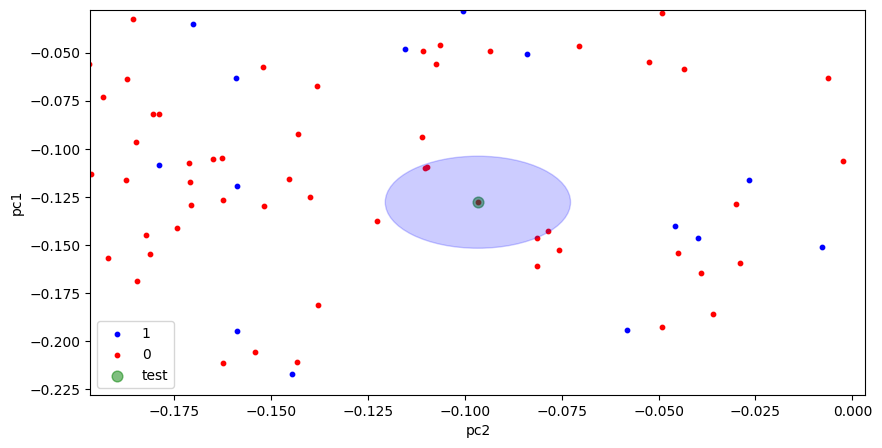

In [121]:
testX = X_test[10]
dists, ind = neigh.kneighbors([testX])
print(dists, ind)
print(knn.predict_proba([testX]))
print(y_pred_sci[0])
plt.figure(figsize=(10,5)) 
plt.scatter(X_pca_plot.pc1[X_pca_plot.target == 1], X_pca_plot.pc2[X_pca_plot.target == 1], color='blue', label='1', s=10)
plt.scatter(X_pca_plot.pc1[X_pca_plot.target == 0], X_pca_plot.pc2[X_pca_plot.target == 0], color='red', label='0', s=10)
plt.scatter(testX[0], testX[1], color='green', label='test', s=60, marker='o', alpha=0.5)
circle1 = plt.Circle((testX[0],testX[1]), dists[0][-1], color='b', alpha=0.2)
plt.gca().add_patch(circle1)
plt.legend()
plt.xlim(testX[0]-0.1, testX[0]+0.1)
plt.ylim(testX[1]-0.1, testX[1]+0.1)
plt.ylabel('pc1')
plt.xlabel('pc2')

#### Ещё немного попытаемся что-то понять

In [122]:
X = np.array(df.drop('Outcome', axis=1))
y = np.array(df['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
knn = KNN(k=10, p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7142857142857143

Найдем лучшие гиперпараметры

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameter_grid = {
    'n_neighbors': np.arange(2, 100, 1),
    'p': [1, 2, 3, 4, 5]
}
grid_searcher = GridSearchCV(estimator=KNeighborsClassifier(),
                             param_grid=parameter_grid,
                             cv=5,
                             scoring='accuracy',
                             n_jobs=-1
                            )

In [124]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'p': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [125]:
grid_searcher.best_params_

{'n_neighbors': 13, 'p': 1}

In [126]:
grid_searcher.best_score_

0.7654271624683461

А теперь графичек

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameter_grid = {
    'n_neighbors': np.arange(2, 30, 1),
    'p': [1]
}
grid_searcher = GridSearchCV(estimator=KNeighborsClassifier(),
                             param_grid=parameter_grid,
                             cv=5,
                             scoring='accuracy',
                             n_jobs=-1
                            )

In [128]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1]},
             scoring='accuracy')

In [129]:
results = pd.DataFrame(grid_searcher.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002136,0.000727,0.026342,0.009424,2,1,"{'n_neighbors': 2, 'p': 1}",0.674797,0.723577,0.739837,0.707317,0.745902,0.718286,0.025561,25
1,0.005663,0.006986,0.026499,0.005681,3,1,"{'n_neighbors': 3, 'p': 1}",0.682927,0.658537,0.747967,0.723577,0.729508,0.708503,0.032792,28
2,0.002037,0.000619,0.031252,0.009143,4,1,"{'n_neighbors': 4, 'p': 1}",0.715447,0.707317,0.731707,0.699187,0.737705,0.718273,0.014494,26
3,0.001984,0.001032,0.028290,0.005935,5,1,"{'n_neighbors': 5, 'p': 1}",0.699187,0.650407,0.747967,0.723577,0.729508,0.710129,0.033689,27
4,0.001677,0.000240,0.031799,0.007464,6,1,"{'n_neighbors': 6, 'p': 1}",0.739837,0.682927,0.747967,0.723577,0.713115,0.721485,0.022800,24


In [130]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      28 non-null     float64
 1   std_fit_time       28 non-null     float64
 2   mean_score_time    28 non-null     float64
 3   std_score_time     28 non-null     float64
 4   param_n_neighbors  28 non-null     object 
 5   param_p            28 non-null     object 
 6   params             28 non-null     object 
 7   split0_test_score  28 non-null     float64
 8   split1_test_score  28 non-null     float64
 9   split2_test_score  28 non-null     float64
 10  split3_test_score  28 non-null     float64
 11  split4_test_score  28 non-null     float64
 12  mean_test_score    28 non-null     float64
 13  std_test_score     28 non-null     float64
 14  rank_test_score    28 non-null     int32  
dtypes: float64(11), int32(1), object(3)
memory usage: 3.3+ KB


In [131]:
results['param_n_neighbors'] = results['param_n_neighbors'].astype('int32')

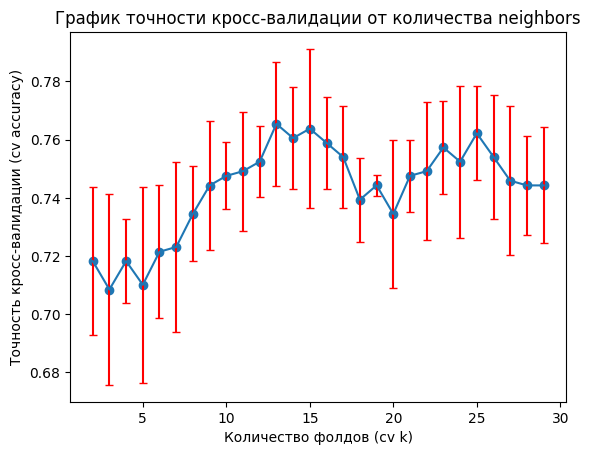

In [132]:
mean_scores = results['mean_test_score'] # Средние значения точности кросс-валидации для всех фолдов
std_scores = results['std_test_score'] # Стандартное отклонение точности кросс-валидации
cv_k = results['param_n_neighbors'] # Количество соседей 
plt.scatter(cv_k, mean_scores)
plt.errorbar(cv_k, mean_scores, yerr=std_scores, capsize=3, ecolor='red')
plt.xlabel('Количество фолдов (cv k)')
plt.ylabel('Точность кросс-валидации (cv accuracy)')
plt.title('График точности кросс-валидации от количества neighbors')
plt.show()

### Постройте две модели k-NN с различными наборами признаков:

#### Модель 1: Признаки случайно отбираются .

In [133]:
import random
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [134]:
def random_knn(X, y, k, p):
    random_columns = random.sample(list(X.columns), random.randint(2, len(X.columns)))
    random_df = X[random_columns]
    display(random_df.head())
    X_train, X_test, y_train, y_test = train_test_split(np.array(random_df), np.array(y), test_size=0.2, random_state=13)
    knn = KNN(k=k, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    display(pd.DataFrame(accuracy_score(y_test, y_pred), index=['accuracy_score'],  columns=['result']))
    sns.heatmap(cm, annot=True, fmt='d')

##### k = 13 p = 1

,Pregnancies,Insulin,Pedigree,BloodPressure,Glucose,BMI
0,0.352941,0.000000,0.234415,0.590164,0.743719,0.500745
1,0.058824,0.000000,0.116567,0.540984,0.427136,0.396423
2,0.470588,0.000000,0.253629,0.524590,0.919598,0.347243
3,0.058824,0.111111,0.038002,0.540984,0.447236,0.418778
4,0.000000,0.198582,0.943638,0.327869,0.688442,0.642325


,result
accuracy_score,0.75974


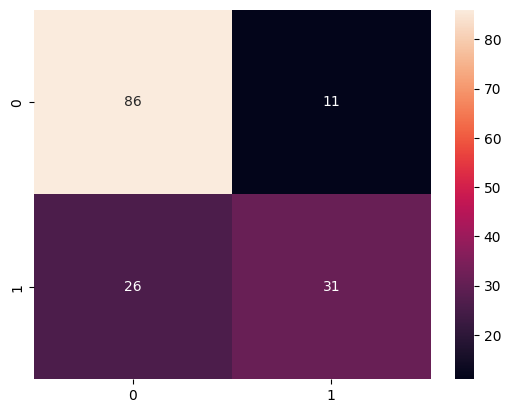

In [135]:
random_knn(X, y, 13, 1)

##### k = 10 p = 2

,BloodPressure,Pedigree,Insulin,Pregnancies
0,0.590164,0.234415,0.000000,0.352941
1,0.540984,0.116567,0.000000,0.058824
2,0.524590,0.253629,0.000000,0.470588
3,0.540984,0.038002,0.111111,0.058824
4,0.327869,0.943638,0.198582,0.000000


,result
accuracy_score,0.636364


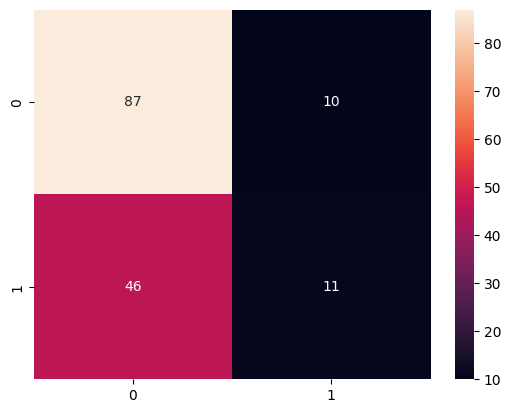

In [136]:
random_knn(X, y, 10, 2)

##### k = 3 p = 3

,Pedigree,SkinThickness,Pregnancies,Glucose
0,0.234415,0.353535,0.352941,0.743719
1,0.116567,0.292929,0.058824,0.427136
2,0.253629,0.000000,0.470588,0.919598
3,0.038002,0.232323,0.058824,0.447236
4,0.943638,0.353535,0.000000,0.688442


,result
accuracy_score,0.675325


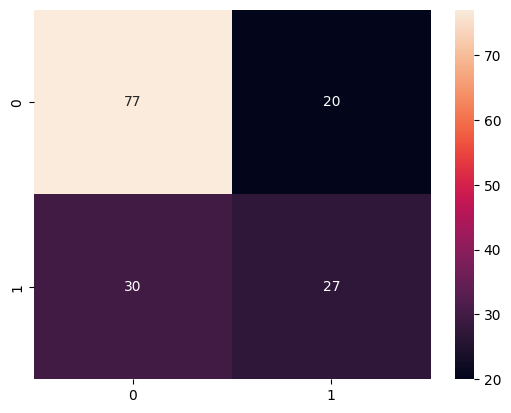

In [137]:
random_knn(X, y, 3, 3)

#### Модель Фиксированный набор признаков, который выбирается заранее.

In [138]:
def fixed_knn(X, y, k, p):
    X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=13)
    knn = KNN(k=k, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    display(pd.DataFrame(accuracy_score(y_test, y_pred), index=['accuracy_score'],  columns=['result']))
    display(pd.DataFrame(confusion_matrix(y_test, y_pred)))

In [139]:
random_columns = random.sample(list(X.columns), random.randint(3, len(X.columns)))
random_df = X[random_columns]
display(random_df.head())

,Age,BloodPressure,BMI,Glucose,SkinThickness,Pregnancies,Insulin
0,0.483333,0.590164,0.500745,0.743719,0.353535,0.352941,0.000000
1,0.166667,0.540984,0.396423,0.427136,0.292929,0.058824,0.000000
2,0.183333,0.524590,0.347243,0.919598,0.000000,0.470588,0.000000
3,0.000000,0.540984,0.418778,0.447236,0.232323,0.058824,0.111111
4,0.200000,0.327869,0.642325,0.688442,0.353535,0.000000,0.198582


In [140]:
parameter_grid = {
    'n_neighbors': np.arange(2, 20, 3),
    'p': [1, 2, 3]
}
for k in parameter_grid['n_neighbors']:
    for p in parameter_grid['p']:
        print(f'k={k}, p={p}')
        fixed_knn(random_df, y, k, p)

k=2, p=1


,result
accuracy_score,0.688312


,0,1
0,87,10
1,38,19


k=2, p=2


,result
accuracy_score,0.694805


,0,1
0,87,10
1,37,20


k=2, p=3


,result
accuracy_score,0.701299


,0,1
0,86,11
1,35,22


k=5, p=1


,result
accuracy_score,0.74026


,0,1
0,81,16
1,24,33


k=5, p=2


,result
accuracy_score,0.74026


,0,1
0,77,20
1,20,37


k=5, p=3


,result
accuracy_score,0.727273


,0,1
0,79,18
1,24,33


k=8, p=1


,result
accuracy_score,0.727273


,0,1
0,84,13
1,29,28


k=8, p=2


,result
accuracy_score,0.733766


,0,1
0,85,12
1,29,28


k=8, p=3


,result
accuracy_score,0.74026


,0,1
0,86,11
1,29,28


k=11, p=1


,result
accuracy_score,0.74026


,0,1
0,84,13
1,27,30


k=11, p=2


,result
accuracy_score,0.727273


,0,1
0,82,15
1,27,30


k=11, p=3


,result
accuracy_score,0.733766


,0,1
0,81,16
1,25,32


k=14, p=1


,result
accuracy_score,0.714286


,0,1
0,86,11
1,33,24


k=14, p=2


,result
accuracy_score,0.75974


,0,1
0,89,8
1,29,28


k=14, p=3


,result
accuracy_score,0.720779


,0,1
0,86,11
1,32,25


k=17, p=1


,result
accuracy_score,0.707792


,0,1
0,86,11
1,34,23


k=17, p=2


,result
accuracy_score,0.733766


,0,1
0,86,11
1,30,27


k=17, p=3


,result
accuracy_score,0.727273


,0,1
0,87,10
1,32,25
